<a href="https://colab.research.google.com/github/venkatvalluri2004/Cognifyz-Technologies_Task/blob/main/3Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
import warnings as war
war.filterwarnings('ignore')


In [112]:
df = pd.read_csv('Restaurant.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [113]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [114]:
df.shape

(9551, 21)

In [115]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [117]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [118]:
df.dropna(inplace=True)

In [119]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [120]:
df.duplicated().sum()

0

In [121]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras?lia', 'Rio de Janeiro', 'S?o Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove',
       'Paynesville', 'Penola', 'Pensacola', 'Phillip Island',
       'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah',
       'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham East',
       'Va

In [122]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru?e?me Mahallesi, Muallim Naci Caddesi, No 56, Be?ikta?, Istanbul',
       'Kuru?e?me Mahallesi, Muallim Naci Caddesi, No 64/B, Be?ikta?, Istanbul',
       'Cafea?a Mahallesi, Bademalt? Sokak, No 21/B, Kad?k?y, Istanbul'],
      dtype=object)

In [123]:
df['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko?uyolu',
       'Kuru?e?me', 'Moda'], dtype=object)

In [124]:
fig = px.scatter_mapbox(data_filtered, lat='Latitude', lon='Longitude', hover_name='Restaurant Name', zoom=10)
fig.update_layout(mapbox_style='open-street-map')
title='Restaurant Location Distribution'
fig.show()

In [125]:
print("Dataset columns:", df.columns)


Dataset columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [126]:
df.rename(columns={'lat': 'Latitude', 'lng': 'Longitude', 'price': 'Price range'}, inplace=True)

In [127]:
required_columns = {'Latitude', 'Longitude', 'City', 'Cuisines', 'Price range'}
missing = required_columns - set(df.columns)
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")


In [128]:
# Step 1: Visualizing Restaurant Distribution on a Map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(restaurant_map)

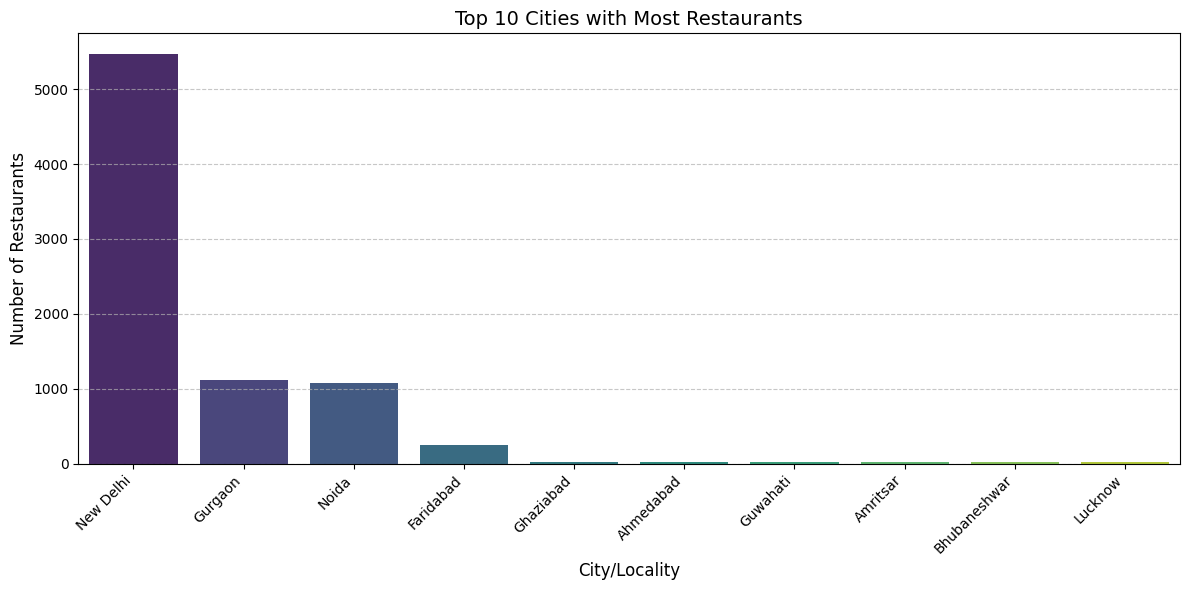

In [129]:
# Grouping by City and getting top 10 cities with most restaurants
top_cities = df['City'].value_counts().head(10)  # Show only top 10 for better visualization

# Create a bigger, clearer figure
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")

# Improve readability
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.xlabel("City/Locality", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.title("Top 10 Cities with Most Restaurants", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better reading

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [130]:
df['Rating text'] = pd.to_numeric(df['Rating text'], errors='coerce')
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')

In [131]:
df['Cuisines'].fillna("Unknown", inplace=True)

In [132]:
def get_mode(series):
    mode_values = series.mode()
    return mode_values[0] if not mode_values.empty else "Unknown"

city_stats = df.groupby('City').agg({
    'Rating text': 'mean',
    'Price range': 'median',
    'Cuisines': get_mode
}).reset_index()


In [133]:
print(df.dtypes)  # Check data types
print(df.isnull().sum())  # Check missing values
print(df.head())  # Preview data


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text             float64
Votes                     int64
dtype: object
Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                  0
Latitude                   0
Cuisines                   0
Average Cost for two    

In [134]:
print("\nCity-wise Statistics:\n", city_stats)


City-wise Statistics:
                 City  Rating text  Price range  \
0          Abu Dhabi          NaN          3.5   
1               Agra          NaN          3.0   
2          Ahmedabad          NaN          3.0   
3             Albany          NaN          2.0   
4          Allahabad          NaN          3.0   
..               ...          ...          ...   
135         Waterloo          NaN          2.0   
136          Weirton          NaN          2.0   
137  Wellington City          NaN          3.0   
138   Winchester Bay          NaN          2.0   
139          Yorkton          NaN          2.0   

                                             Cuisines  
0                                            American  
1                               North Indian, Mughlai  
2    Cafe, American, Continental, Armenian, Fast Food  
3                              Japanese, Steak, Sushi  
4                               North Indian, Chinese  
..                                     

In [135]:
# Identifying Patterns and Insights
top_cities = city_counts.head(10)
print(f"\nTop 10 Cities with Most Restaurants:\n{top_cities}")



Top 10 Cities with Most Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


In [136]:
# Find cities with highest and lowest average ratings
highest_rated = city_stats.sort_values('Rating text', ascending=False).head(5)
lowest_rated = city_stats.sort_values('Rating text', ascending=True).head(5)

print("\nHighest Rated Cities:\n", highest_rated)
print("\nLowest Rated Cities:\n", lowest_rated)


Highest Rated Cities:
         City  Rating text  Price range  \
0  Abu Dhabi          NaN          3.5   
1       Agra          NaN          3.0   
2  Ahmedabad          NaN          3.0   
3     Albany          NaN          2.0   
4  Allahabad          NaN          3.0   

                                           Cuisines  
0                                          American  
1                             North Indian, Mughlai  
2  Cafe, American, Continental, Armenian, Fast Food  
3                            Japanese, Steak, Sushi  
4                             North Indian, Chinese  

Lowest Rated Cities:
         City  Rating text  Price range  \
0  Abu Dhabi          NaN          3.5   
1       Agra          NaN          3.0   
2  Ahmedabad          NaN          3.0   
3     Albany          NaN          2.0   
4  Allahabad          NaN          3.0   

                                           Cuisines  
0                                          American  
1              